In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
%matplotlib inline

In [2]:
def cleanup_campus(campus):
    new_val=campus
    if "EL" in campus:
        new_val = campus.replace('EL','Elementary School')
    elif "H S" in campus:
        new_val = campus.replace('H S','High School')
    elif "M S" in campus:
        new_val = campus.replace("M S","Middle School")
    return new_val.title()

In [3]:

def getpds(file_nm):
    data_file1=pd.read_csv(file_nm)
    df_data=pd.DataFrame(data_file1)
    df_data.rename(columns=(lambda x: x.strip().replace(' ',"_").lower()),inplace =True)
    df=df_data[["year","district_name","campus_name","total_enrollment","total_economically_disadvantaged_students","total_title_i_students","total_at_risk_students"]]
    df.loc[:,'school_type'] = df['campus_name'].map(lambda x: get_type(x))
    df.rename(columns={
        "year":"year",
        "district_name":"district",
        "campus_name":"campus",
        "school_type":"school_type",
        "total_enrollment":"total_enroll",
        "total_economically_disadvantaged_students":"total_disadvtg",
        "total_title_i_students":"total_title1",
        "total_at_risk_students":"total_atrisk"
    },inplace=True)
    df=df.replace(-9999999,2)
    df=df[df["campus"]!="NOT APPLICABLE"].reset_index(drop=True)
    #use loc to avoid warning when adding new column
    
    df.loc[:,'campus']=df['campus'].map(lambda x: cleanup_campus(x))
    return df


In [4]:
def get_type(type_of):
    sch_type="Other"
    if 'H S' in type_of:
        sch_type= 'High'
    elif 'M S' in type_of or 'MIDDLE' in type_of or type_of=="SADLER MEANS YWLA" or type_of =="GUERRERO THOMPSON":
        sch_type= "Middle"
    elif 'EL' in type_of or 'Pre-K' in type_of or 'PRI CENTER' in type_of or type_of =="ROSEDALE" or 'EARLY' in type_of:
        sch_type= "Elementary"
    elif type_of =="ALTERNATIVE LEARNING CENTER" or type_of =="PHOENIX ACADEMY" or type_of=="TRAVIS COUNTY DAY SCHOOL" or type_of =="LEADERSHIP ACADEMY" or type_of== "RICHARDS SCH FOR YOUNG WOMEN LEADE" or type_of =="EASTSIDE MEMORIAL AT THE JOHNSTON" or type_of =="AUSTIN ST HOSPITAL":
        sch_type="High"
    return sch_type

In [5]:

enroll_1415_df=getpds("StudPgmDistrictCampus15district227901.csv")
enroll_1516_df=getpds("StudPgmDistrictCampus16district227901.csv")
enroll_1617_df=getpds("StudPgmDistrictCampus17district227901.csv")
enroll_1718_df=getpds("StudPgmDistrictCampus18district227901.csv")

C:\Users\gairo\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\gairo\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\gairo\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexi

In [6]:
#concat all the years
frames=[enroll_1415_df,enroll_1516_df,enroll_1617_df,enroll_1718_df]
enroll_1418_df=pd.concat(frames)
enroll_1418_df.head()

,year,district,campus,total_enroll,total_disadvtg,total_title1,total_atrisk,school_type
0,2014-2015,AUSTIN ISD,Austin High School,2085,599,11,792,High
1,2014-2015,AUSTIN ISD,Lanier High School,1619,1386,1619,1220,High
2,2014-2015,AUSTIN ISD,Mccallum High School,1648,524,33,677,High
3,2014-2015,AUSTIN ISD,Reagan High School,1229,1012,1229,879,High
4,2014-2015,AUSTIN ISD,Travis High School,1329,1138,1329,1019,High


In [7]:
def enroll_graph_call(call_year):
    Avg_enroll=enroll_1418_df[enroll_1418_df['year']==call_year].groupby('school_type').mean().plot(kind="bar")
    plt.xlabel("")
    plt.ylabel("Averge Enrollment")
    plt.title(f"Average Enrollment({call_year})")
    plt.grid()
    plt.legend(["Enroll","Disadvtg","Title 1","At Risk"])
    plt.show()


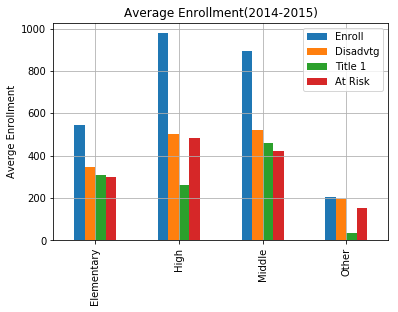

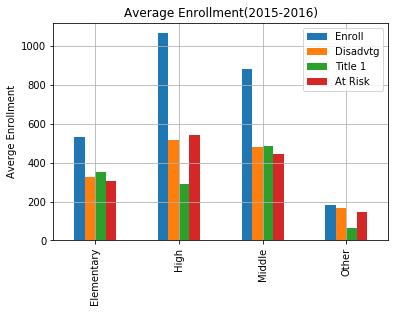

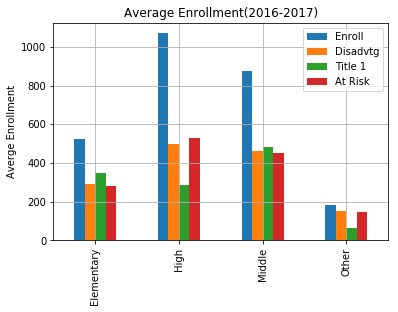

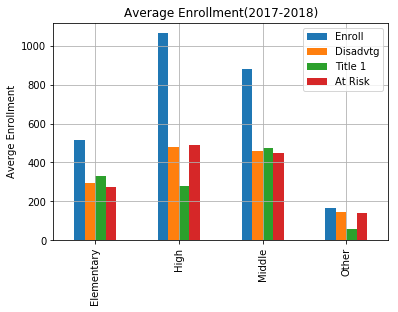

In [8]:
enroll_graph_call("2014-2015")
enroll_graph_call("2015-2016")
enroll_graph_call("2016-2017")
enroll_graph_call("2017-2018")

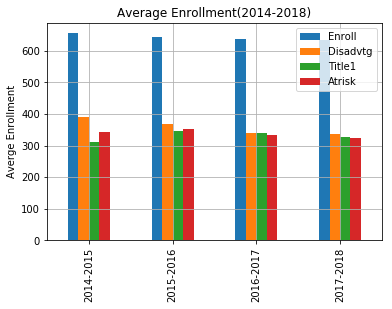

In [9]:
Avg_enroll=enroll_1418_df.groupby('year').mean().plot(kind="bar")
plt.xlabel("")
plt.ylabel("Averge Enrollment")
plt.title(f"Average Enrollment(2014-2018)")
plt.grid()
plt.legend(["Enroll","Disadvtg","Title1","Atrisk"])
plt.show()

In [10]:
enroll_1418_df["title1_rate"]=100 * enroll_1418_df['total_title1']/enroll_1418_df['total_enroll']


In [11]:
title1_enroll_1418_df=enroll_1418_df[["year","total_enroll","title1_rate"]]

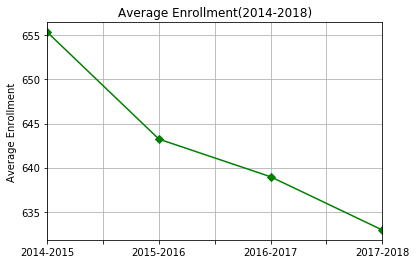

In [12]:
df=title1_enroll_1418_df.groupby('year')["total_enroll"].mean().plot(color='green',marker="D")
plt.xlabel("")
plt.ylabel("Average Enrollment")
plt.title(f"Average Enrollment(2014-2018)")
plt.grid()


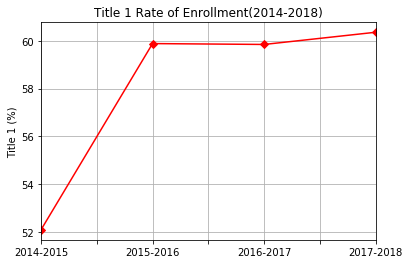

In [13]:
df2=title1_enroll_1418_df.groupby('year')["title1_rate"].mean().plot(color="red",marker='D')
plt.xlabel("")
plt.ylabel("Title 1 (%)")
plt.title(f"Title 1 Rate of Enrollment(2014-2018)")
plt.grid()
plt.show()

In [14]:

df3=enroll_1415_df.groupby(['year','campus'])['total_enroll'].max().sort_values(ascending=False).reset_index()
df=df3.loc[0:4,]
df

,year,campus,total_enroll
0,2014-2015,Bowie High School,2871
1,2014-2015,Akins High School,2667
2,2014-2015,Anderson High School,2224
3,2014-2015,Austin High School,2085
4,2014-2015,Mccallum High School,1648


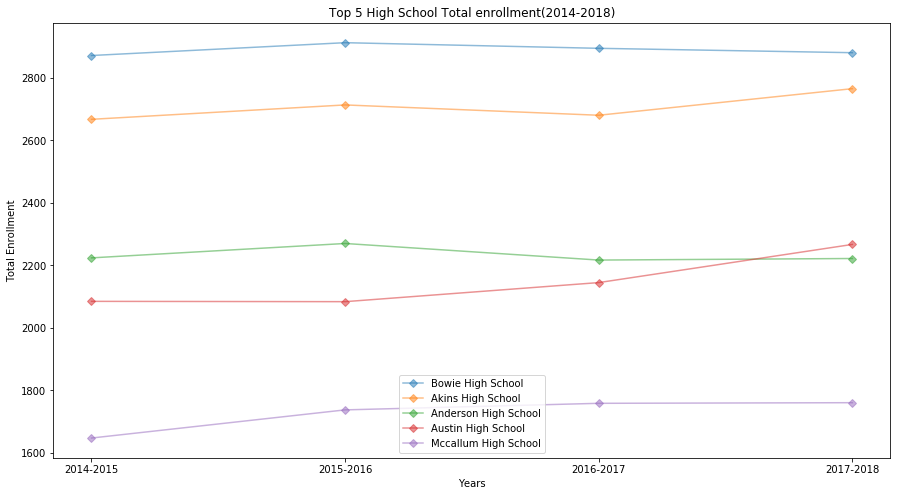

In [15]:
years=["2014-2015","2015-2016","2016-2017",'2017-2018']
x_axis=np.arange(len(years))
tick_locations= [val for val in x_axis]
plt.figure(figsize=(15,8))
plt.xticks(tick_locations, years)

colors=["r""g","b","b"]
labels=["Bowie High School","Akins High School","Anderson High School","Austin High School","Mccallum High School"]
i=0
for val in df['campus']:
    y_axis=enroll_1418_df[enroll_1418_df["campus"]==val]['total_enroll']
    plt.plot(x_axis, y_axis,alpha=0.5, label=labels[i],marker="D")
    i+=1

plt.title("Top 5 High School Total enrollment(2014-2018)")
plt.ylabel("Total Enrollment")
plt.xlabel("Years")

plt.legend(loc="best")
plt.show()

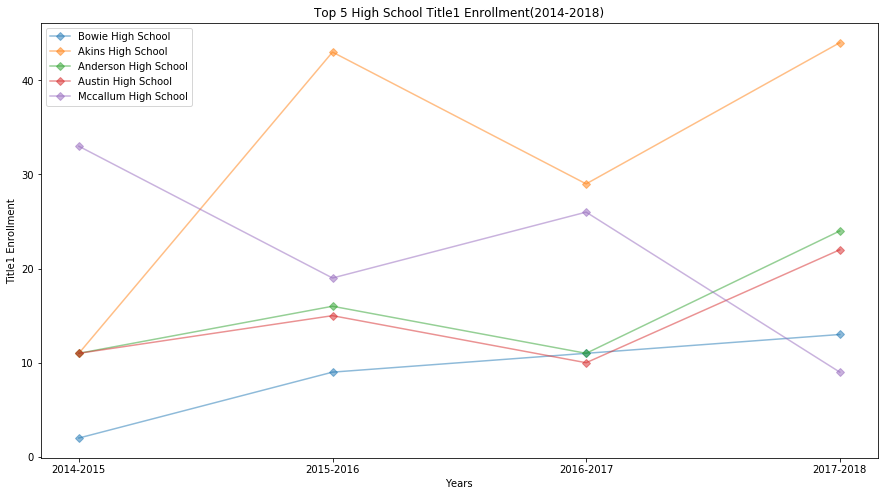

In [16]:
plt.figure(figsize=(15,8))
plt.xticks(tick_locations, years)

i=0
for val in df['campus']:
    y_axis=enroll_1418_df[enroll_1418_df["campus"]==val]['total_title1']
    plt.plot(x_axis, y_axis,alpha=0.5, label=labels[i],marker="D")
    i+=1

plt.title("Top 5 High School Title1 Enrollment(2014-2018)")
plt.ylabel("Title1 Enrollment")
plt.xlabel("Years")

plt.legend(loc="best")
plt.show()

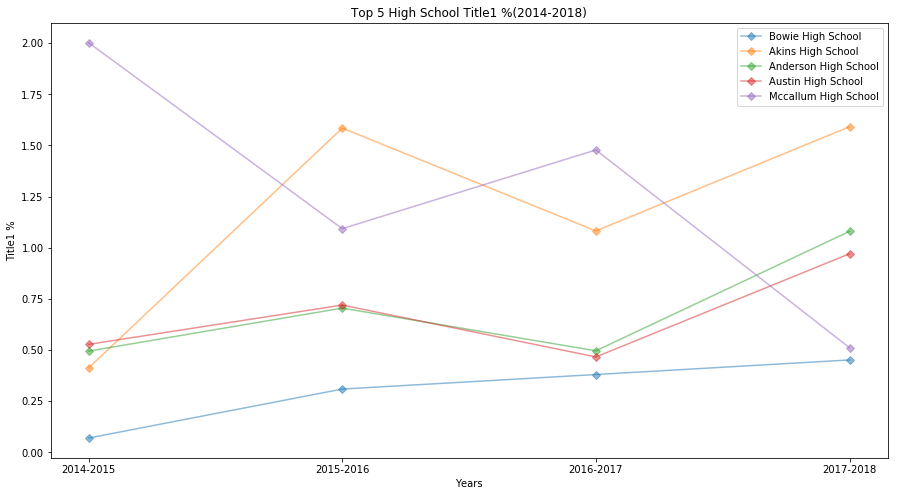

In [18]:
plt.figure(figsize=(15,8))
plt.xticks(tick_locations, years)
i=0
for val in df['campus']:
    y_axis=enroll_1418_df[enroll_1418_df["campus"]==val]['title1_rate']
    plt.plot(x_axis, y_axis,alpha=0.5, label=labels[i],marker="D")
    i+=1

plt.title("Top 5 High School Title1 %(2014-2018)")
plt.ylabel("Title1 %")
plt.xlabel("Years")

plt.legend(loc="best")
plt.show()